In [43]:
%matplotlib notebook

import numpy as np
import scipy
import h5py
from scipy import optimize
from scipy import interpolate
import matplotlib as mpl
from matplotlib import pyplot as plt
import math
from pathlib import Path
import pandas as pd
import os
import os.path
import csv
from scipy.interpolate import interp1d
import warnings
warnings.simplefilter('always', DeprecationWarning)
warnings.filterwarnings('ignore')

In [46]:
os.chdir('/Users/niloo/Downloads')
os.getcwd()

'/Users/niloo/Downloads'

In [47]:
Mar12 = h5py.File('Mar_12_with_types_all_data.h5','r')
type_Mar12 = Mar12['MC/type_fractions'][:]
Dec7 = h5py.File('Dec_7_with_types_all_data.h5','r')
type_Dec7 = Dec7['MC/type_fractions'][:]
Nov3 = h5py.File('Nov_3_with_types_all_data.h5','r')
type_Nov3 = Nov3['MC/type_fractions'][:]
May_11 = h5py.File('May_11_2021_all_data.h5','r')
type_May11 = May_11['MC/type_fractions'][:]

In [4]:
# the order might be wrong, should be check later which is which
sideblobs_Mar,marbles_Mar,fractured_Mar,water_Mar = np.moveaxis(type_Mar12, -1, 0)
sideblobs_Dec,marbles_Dec,fractured_Dec,water_Dec = np.moveaxis(type_Dec7, -1, 0)
sideblobs_Nov,marbles_Nov,fractured_Nov,water_Nov = np.moveaxis(type_Nov3, -1, 0)
sideblobs_May,marbles_May,fractured_May,water_May = np.moveaxis(type_May11, -1, 0)

In [5]:
# needs to be check if the fractions are out of total droplets or frozen droplets
percentile = 5
low_count_sideblobs_Mar = np.percentile(sideblobs_Mar, q=percentile, axis=0)
high_count_sideblobs_Mar = np.percentile(sideblobs_Mar, q=100-percentile, axis=0)
low_count_marbles_Mar = np.percentile(marbles_Mar, q=percentile, axis=0)
high_count_marbles_Mar = np.percentile(marbles_Mar, q=100-percentile, axis=0)
low_count_fractured_Mar = np.percentile(fractured_Mar, q=percentile, axis=0)
high_count_fractured_Mar = np.percentile(fractured_Mar, q=100-percentile, axis=0)
low_count_water_Mar = np.percentile(water_Mar, q=percentile, axis=0)
high_count_water_Mar = np.percentile(water_Mar, q=100-percentile, axis=0)

In [31]:
file = open("March_shape_error.txt", "w")
header = ['lowerr_sideblobs', 'higherr_sideblobs', 'lowerr_marbles', 'higherr_marbles', 'lowerr_fractured', 'higherr_fractured', 'lowerr_water', 'higherr_water']
writer = csv.writer(file)
writer.writerow(header)
for w in range(len(low_count_sideblobs_Mar)):
    writer.writerow([low_count_sideblobs_Mar[w], high_count_sideblobs_Mar[w], low_count_marbles_Mar[w], high_count_marbles_Mar[w], low_count_fractured_Mar[w], high_count_fractured_Mar[w], low_count_water_Mar[w], high_count_water_Mar[w]])
file.close()

In [33]:
low_count_sideblobs_Dec = np.percentile(sideblobs_Dec, q=percentile, axis=0)
high_count_sideblobs_Dec = np.percentile(sideblobs_Dec, q=100-percentile, axis=0)
low_count_marbles_Dec = np.percentile(marbles_Dec, q=percentile, axis=0)
high_count_marbles_Dec = np.percentile(marbles_Dec, q=100-percentile, axis=0)
low_count_fractured_Dec = np.percentile(fractured_Dec, q=percentile, axis=0)
high_count_fractured_Dec = np.percentile(fractured_Dec, q=100-percentile, axis=0)
low_count_water_Dec = np.percentile(water_Dec, q=percentile, axis=0)
high_count_water_Dec = np.percentile(water_Dec, q=100-percentile, axis=0)

In [34]:
file = open("Dec_shape_error.txt", "w")
header = ['lowerr_sideblobs', 'higherr_sideblobs', 'lowerr_marbles', 'higherr_marbles', 'lowerr_fractured', 'higherr_fractured', 'lowerr_water', 'higherr_water']
writer = csv.writer(file)
writer.writerow(header)
for w in range(len(low_count_sideblobs_Dec)):
    writer.writerow([low_count_sideblobs_Dec[w], high_count_sideblobs_Dec[w], low_count_marbles_Dec[w], high_count_marbles_Dec[w], low_count_fractured_Dec[w], high_count_fractured_Dec[w], low_count_water_Dec[w], high_count_water_Dec[w]])
file.close()

In [36]:
low_count_sideblobs_Nov = np.percentile(sideblobs_Nov, q=percentile, axis=0)
high_count_sideblobs_Nov = np.percentile(sideblobs_Nov, q=100-percentile, axis=0)
low_count_marbles_Nov = np.percentile(marbles_Nov, q=percentile, axis=0)
high_count_marbles_Nov = np.percentile(marbles_Nov, q=100-percentile, axis=0)
low_count_fractured_Nov = np.percentile(fractured_Nov, q=percentile, axis=0)
high_count_fractured_Nov = np.percentile(fractured_Nov, q=100-percentile, axis=0)
low_count_water_Nov = np.percentile(water_Nov, q=percentile, axis=0)
high_count_water_Nov = np.percentile(water_Nov, q=100-percentile, axis=0)

In [37]:
file = open("Nov_shape_error.txt", "w")
header = ['lowerr_sideblobs', 'higherr_sideblobs', 'lowerr_marbles', 'higherr_marbles', 'lowerr_fractured', 'higherr_fractured', 'lowerr_water', 'higherr_water']
writer = csv.writer(file)
writer.writerow(header)
for w in range(len(low_count_sideblobs_Nov)):
    writer.writerow([low_count_sideblobs_Nov[w], high_count_sideblobs_Nov[w], low_count_marbles_Nov[w], high_count_marbles_Nov[w], low_count_fractured_Nov[w], high_count_fractured_Nov[w], low_count_water_Nov[w], high_count_water_Nov[w]])
file.close()

In [39]:
low_count_sideblobs_May = np.percentile(sideblobs_May, q=percentile, axis=0)
high_count_sideblobs_May = np.percentile(sideblobs_May, q=100-percentile, axis=0)
low_count_marbles_May = np.percentile(marbles_May, q=percentile, axis=0)
high_count_marbles_May = np.percentile(marbles_May, q=100-percentile, axis=0)
low_count_fractured_May = np.percentile(fractured_May, q=percentile, axis=0)
high_count_fractured_May = np.percentile(fractured_May, q=100-percentile, axis=0)
low_count_water_May = np.percentile(water_May, q=percentile, axis=0)
high_count_water_May = np.percentile(water_May, q=100-percentile, axis=0)

In [40]:
file = open("May_shape_error.txt", "w")
header = ['lowerr_sideblobs', 'higherr_sideblobs', 'lowerr_marbles', 'higherr_marbles', 'lowerr_fractured', 'higherr_fractured', 'lowerr_water', 'higherr_water']
writer = csv.writer(file)
writer.writerow(header)
for w in range(len(low_count_sideblobs_May)):
    writer.writerow([low_count_sideblobs_May[w], high_count_sideblobs_May[w], low_count_marbles_May[w], high_count_marbles_May[w], low_count_fractured_May[w], high_count_fractured_May[w], low_count_water_May[w], high_count_water_May[w]])
file.close()

In [41]:
# Experimental counts taken from Excel spreadsheets

## https://docs.google.com/spreadsheets/d/11-GYikog0r1H5IH8vmNHlBlmi4fgEX_WUqMD0C2dIpY/edit#gid=0

### https://docs.google.com/spreadsheets/d/1hehhA5_4KUnQsu4NO65z8yoEY9_keCoH/edit#gid=655011514

#### https://docs.google.com/spreadsheets/d/1vLBLDDu8vQx1R1nRL9ML0Zp7wrktrKi3laL0rhxsNr8/edit#gid=81409557

time_Mar = np.array([1.068999028,1.554907677,1.943634597,2.429543246,2.915451895,3.401360544,3.644314869,
                     3.887269193,4.130223518,4.373177843,4.616132167,4.859086492])

Mar_total_counts = np.array([357,183,105,158,113,471,319,406,327,454,206,220])

Mar_water_counts = np.array([357, 183, 105, 158, 111, 444, 289, 378, 303, 377, 78, 18])

Mar_sideblobs_counts = np.array([0,0,0,0,1,16,23,19,17,34,50,140])

Mar_marbles_counts = np.array([0,0,0,0,1,9,4,4,3,36,70,39])

Mar_fractured_counts = np.array([0,0,0,0,0,0,0,3,1,5,6,16])

<IPython.core.display.Javascript object>


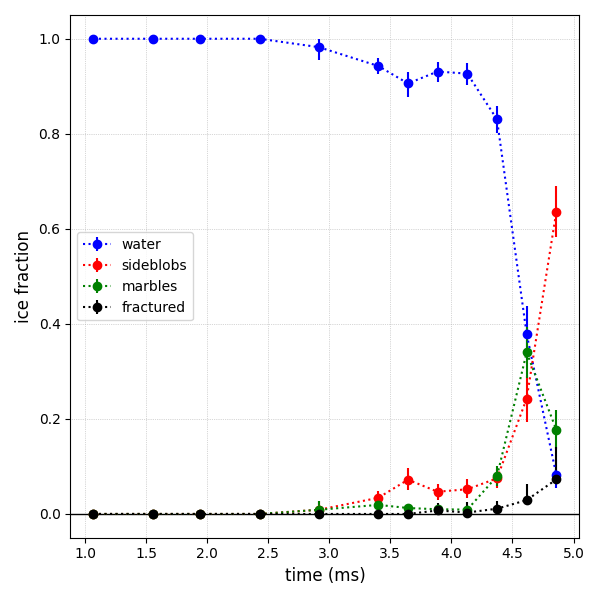

In [42]:
# Plot errorbars for march data
plt.figure(figsize=[6,6])
err_linestyle = {"linestyle":":", "linewidth":1, "markeredgewidth":1.5, "elinewidth":1, "capsize":2}
plt.errorbar(time_Mar, Mar_water_counts/Mar_total_counts, yerr=[Mar_water_counts/Mar_total_counts-low_count_water_Mar, high_count_water_Mar-Mar_water_counts/Mar_total_counts], fmt ='bo:', label='water')
plt.errorbar(time_Mar, Mar_sideblobs_counts/Mar_total_counts, yerr=[Mar_sideblobs_counts/Mar_total_counts-low_count_sideblobs_Mar, high_count_sideblobs_Mar-Mar_sideblobs_counts/Mar_total_counts], fmt='ro:', label='sideblobs')
plt.errorbar(time_Mar, Mar_marbles_counts/Mar_total_counts, yerr=[Mar_marbles_counts/Mar_total_counts-low_count_marbles_Mar, high_count_marbles_Mar-Mar_marbles_counts/Mar_total_counts], fmt='go:', label='marbles')
plt.errorbar(time_Mar, Mar_fractured_counts/Mar_total_counts, yerr=[Mar_fractured_counts/Mar_total_counts-low_count_fractured_Mar, high_count_fractured_Mar-Mar_fractured_counts/Mar_total_counts], fmt='ko:', label='fractured')
plt.ylabel('ice fraction', fontsize = 12)
plt.xlabel('time (ms)', fontsize = 12)
#plt.title('percentage of frozen droplets')
plt.axhline(0,c='black',lw=1)
plt.grid(linestyle='dotted', lw=0.5)
plt.legend(loc='center left',fontsize=10)
plt.tight_layout()
plt.show()